In [9]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
import matplotlib.pyplot as plt

In [50]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784, 10)

    def forward(self, x):
        out = self.layer1(x)
        return out

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

TypeError: Invalid shape (1, 28, 28) for image data

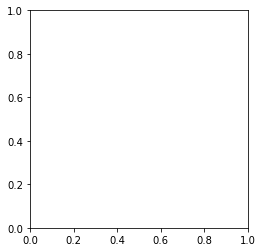

In [40]:
transform = torchvision.transforms.ToTensor()
dataset = torchvision.datasets.MNIST('./', download=True, train=True, transform=transform)
x = dataset[30]
print(x)
plt.imshow(np.array(x[0]))

In [42]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=16)

In [57]:
error_function = nn.CrossEntropyLoss()
model = NeuralNetwork()

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


for epoch in range(200):
    
    running_error = 0
    for (image, label) in dataloader:
        image = image.reshape(16, 784)
        prediction = model(image)

        loss = error_function(prediction, label)
        
        running_error += loss
        
        optimizer.zero_grad() 
        loss.backward()       #How to update weights
        optimizer.step()      # Update weights
        
    print(f"Epoch {epoch}. Loss: {running_error / len(dataloader)}")

Epoch 0. Loss: 1.3479065895080566


Epoch 1. Loss: 0.7744324803352356


Epoch 2. Loss: 0.62945955991745


Epoch 3. Loss: 0.559420645236969


Epoch 4. Loss: 0.5167733430862427


Epoch 5. Loss: 0.48749685287475586


Epoch 6. Loss: 0.4658615291118622


Epoch 7. Loss: 0.44905152916908264


Epoch 8. Loss: 0.4355110228061676


Epoch 9. Loss: 0.4243016541004181


Epoch 10. Loss: 0.414822518825531


Epoch 11. Loss: 0.4066687822341919


Epoch 12. Loss: 0.39955630898475647


Epoch 13. Loss: 0.3932785391807556


Epoch 14. Loss: 0.3876846134662628


Epoch 15. Loss: 0.3826543092727661


Epoch 16. Loss: 0.3781012296676636


KeyboardInterrupt: 

5
tensor(5)


/tmp/ipykernel_834/1919528280.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(sample[0])


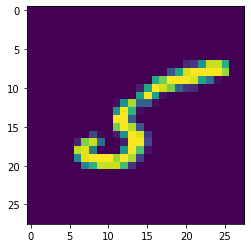

In [71]:
sample = dataset[11]
print(sample[1])
x = torch.tensor(sample[0])

plt.imshow(x.permute(1, 2, 0).numpy())


output = model(x.reshape(1, 784))

print(output.argmax())